<a class="anchor" id="0"></a>
# **W3_CLASS ASSIGMENT_ VALENTYNO MARCEL**

In [33]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [35]:
df['Health_Issues'] = df['Health_Issues'].fillna('none')
df['Health_Issues'].value_counts()

,count
Health_Issues,
none,5941
Mild,3579
Moderate,463
Severe,17


This code replaces missing values (NaN) in the 'Health_Issues' column with the string 'none'. This is done to handle missing data, which many machine learning algorithms cannot process. Since 'Health_Issues' is a categorical variable, 'none' is treated as a separate category. The value_counts() part shows the frequency of each health issue category after this replacement.



### View summary of dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            10000 non-null  object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [37]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [38]:
col_names = ['Gender', 'Sleep_Quality', 'Country']

for col in col_names:
    print(df[col].value_counts())

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64


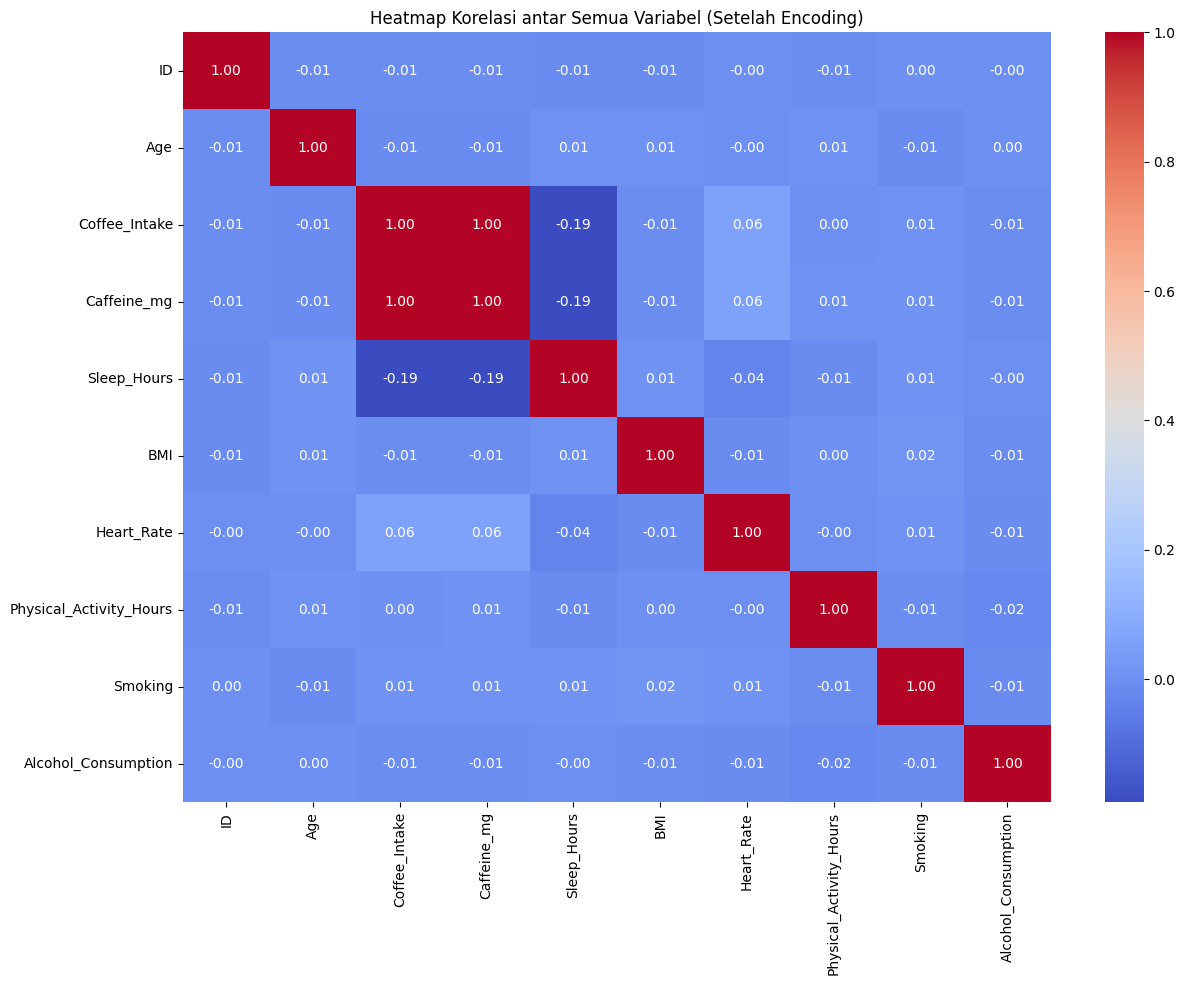

In [39]:
# Calculate the correlation matrix for all variables
correlation_matrix_all = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Semua Variabel (Setelah Encoding)')
plt.show()

Based on the correlation heatmap, the three strongest relationships among the variables are:

Sleep Hours and Sleep Quality (correlation = 0.91, very strong positive).
→ The longer a person sleeps, the better their reported sleep quality tends to be.

Coffee Intake and Caffeine (mg) (correlation = 1.00, perfect positive).
→ Higher coffee consumption directly corresponds to higher caffeine intake.

Sleep Quality and Coffee Intake / Caffeine (mg) (correlation ≈ -0.17 to -0.19, weak negative).
→ Increased coffee or caffeine consumption is slightly associated with lower sleep quality.

In summary, the most significant associations are found between sleep-related variables (hours and quality) and coffee consumption. This suggests that both sleep duration and caffeine intake play important roles in influencing perceived sleep quality.

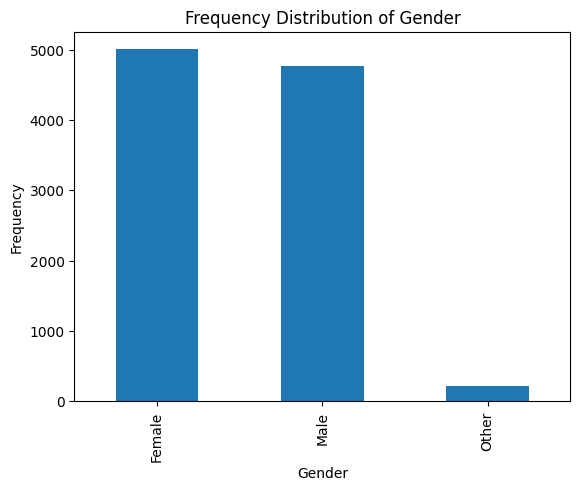

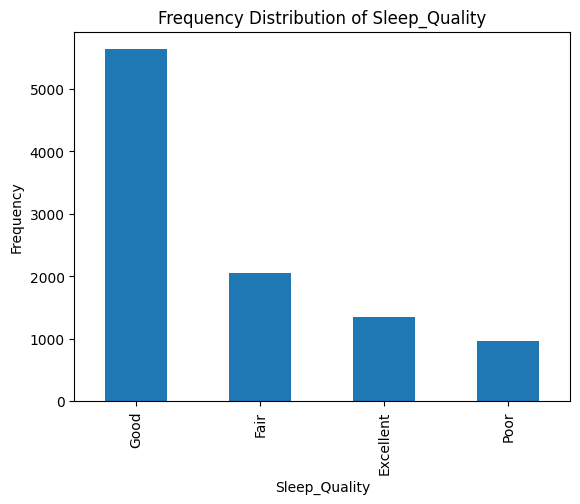

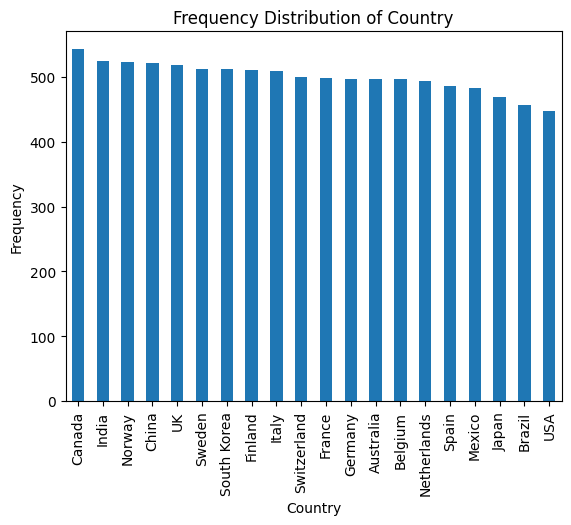

In [40]:
col_names =  ['Gender', 'Sleep_Quality', 'Country']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

Summary of variables

-----

Frequency Distribution of Country

This chart shows the number of respondents from various countries. The distribution is relatively balanced across countries, but Canada has the highest number of respondents, while the USA has the lowest.

-----

Frequency Distribution of Sleep_Quality

The majority of respondents reported their sleep quality as “Good,” followed by “Fair,” and then “Excellent.” Only a few reported their sleep quality as “Poor.” This indicates that most respondents feel their sleep is fairly good.

-----
Frequency Distribution of Gender

The majority of respondents are female, followed by male with a slightly lower number. Meanwhile, the “other” category is very small compared to the two main groups.

----

The target variable is Health_Issues.

### Explore `Health_Issues` variable

In [41]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
none,5941
Mild,3579
Moderate,463
Severe,17


The `Health_Issues` target variable is ordinal in nature and also have 5941 ;'none'



### Missing values in variables

In [42]:
# check missing values in variables

df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


We can see that there are 5941 missing values in the 'Health_Issues'.

### Encode categorical variables


Now, I will encode the categorical variables.

In [43]:
for column in  ['Gender', 'Sleep_Quality', 'Country', 'Health_Issues']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Good' 'Fair' 'Excellent' 'Poor']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['none' 'Mild' 'Moderate' 'Severe']


In [70]:
# Encoding for ordinal column
Gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
Sleep_Quality_map = {'Good': 3, 'Fair': 2, 'Excellent': 4, 'Poor': 1}
Country_map = {'Germany' : 1 ,'Brazil': 2, 'Spain': 3, 'Mexico' : 4, 'France' : 5, 'Canada' : 6,  'UK' : 7, 'Switzerland' :8, 'Netherlands':9, 'Italy':10, 'China':11, 'Japan':12, 'Belgium':13, 'Finland':14, 'Australia':15, 'USA':16, 'Sweden':17, 'India':18, 'Norway':19, 'South Korea' :20}
Health_Issues_map = {'none':0, 'Mild':1, 'Moderate':2, 'Severe':3}

df['Gender'] = df['Gender'].map(Gender_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(Sleep_Quality_map)
df['Country'] = df['Country'].map(Country_map)

df.sample(n = 5)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
1241,1242,32,NaN,NaN,1.6,148.1,6.1,NaN,20.1,86,Low,2.9,none,Healthcare,0,0
2606,2607,27,NaN,NaN,3.1,298.6,7.6,NaN,24.7,91,Low,8.3,none,Student,1,0
7430,7431,35,NaN,NaN,2.3,215.0,7.4,NaN,25.0,78,Low,9.4,none,Service,1,1
7862,7863,18,NaN,NaN,0.0,0.0,8.9,NaN,28.7,65,Low,8.4,none,Student,0,1
8151,8152,28,NaN,NaN,3.4,318.3,6.6,NaN,24.5,83,Low,6.5,none,Other,0,0


In [45]:
display(df.head())

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,1,1,3.5,328.1,7.5,3.0,24.9,78,Low,14.5,none,Other,0,0
1,2,33,1,1,1.0,94.1,6.2,3.0,20.0,67,Low,11.0,none,Service,0,0
2,3,42,1,2,5.3,503.7,5.9,2.0,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,1,1,2.6,249.2,7.3,3.0,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,2,3,3.1,298.0,5.3,2.0,24.1,76,Medium,8.5,Mild,Student,0,1


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [46]:
X = df[['Gender', 'Sleep_Quality', 'Country']]

y = df['Health_Issues']

In [47]:
X.head()

,Gender,Sleep_Quality,Country
0,1,3.0,1
1,1,3.0,1
2,1,2.0,2
3,1,3.0,1
4,2,2.0,3


In [48]:
y.head()

,Health_Issues
0,none
1,none
2,Mild
3,Mild
4,Mild


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [49]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [50]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 3), (2000, 3))

In [51]:
X_train.head()

,Gender,Sleep_Quality,Country
9254,1,2.0,3
1561,1,2.0,18
1670,1,3.0,20
6087,1,4.0,20
6669,2,4.0,7


In [52]:
X_test.head()

,Gender,Sleep_Quality,Country
6252,1,3.0,19
4684,2,3.0,4
1731,1,3.0,15
4742,1,2.0,1
4521,1,3.0,10


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [53]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [54]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [55]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [56]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8520


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9, 'x[1] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [2885, 380, 12, 4723]'),
 Text(0.25, 0.7, 'x[0] <= 2.5\ngini = 0.253\nsamples = 2446\nvalue = [2085, 349, 12, 0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[2] <= 5.5\ngini = 0.255\nsamples = 2394\nvalue = [2037, 345, 12, 0]'),
 Text(0.0625, 0.3, 'x[2] <= 3.5\ngini = 0.277\nsamples = 574\nvalue = [479.0, 94.0, 1.0, 0.0]'),
 Text(0.03125, 0.1, 'gini = 0.256\nsamples = 359\nvalue = [305, 53, 1, 0]'),
 Text(0.09375, 0.1, 'gini = 0.309\nsamples = 215\nvalue = [174, 41, 0, 0]'),
 Text(0.1875, 0.3, 'x[2] <= 16.5\ngini = 0.248\nsamples = 1820\nvalue = [1558.0, 251.0, 11.0, 0.0]'),
 Text(0.15625, 0.1, 'gini = 0.24\nsamples = 1299\nvalue = [1120.0, 168.0, 11.0, 0.0]'),
 Text(0.21875, 0.1, 'gini = 0.268\nsamples = 521\nvalue = [438, 83, 0, 0]'),
 Text(0.375, 0.5, 'x[2] <= 11.5\ngini = 0.142\nsamples = 52\nvalue = [48, 4, 0, 0]'),
 Text(0.3125, 0.3, 'x[2] <= 6.5\ngini = 0.057\nsamples = 34\nvalue = [33, 1, 0, 0]'),
 Text

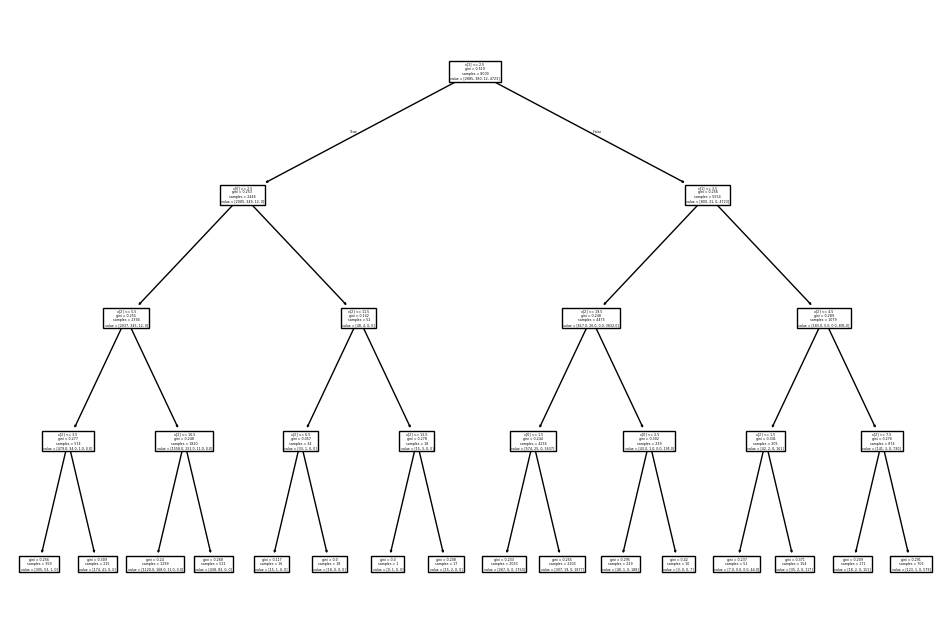

In [57]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

The decision trees show that Sleep Quality is the most important factor in predicting Health Issues. Lower sleep quality (Poor/Fair) is more associated with health issues, while higher sleep quality (Good/Excellent) is mostly associated with no health issues. Gender and Country also play a role, but less significantly than Sleep Quality.

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [58]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [59]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [60]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8525


### Visualize decision-trees

[Text(0.5, 0.875, 'x[1] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [2885, 380, 12, 4723]'),
 Text(0.25, 0.625, 'x[2] <= 16.5\nentropy = 0.635\nsamples = 2446\nvalue = [2085, 349, 12, 0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 8.5\nentropy = 0.633\nsamples = 1919\nvalue = [1642, 265, 12, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.613\nsamples = 954\nvalue = [813, 140, 1, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.644\nsamples = 965\nvalue = [829.0, 125.0, 11.0, 0.0]'),
 Text(0.375, 0.375, 'x[2] <= 19.5\nentropy = 0.633\nsamples = 527\nvalue = [443, 84, 0, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.663\nsamples = 412\nvalue = [341, 71, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.509\nsamples = 115\nvalue = [102, 13, 0, 0]'),
 Text(0.75, 0.625, 'x[0] <= 1.5\nentropy = 0.643\nsamples = 5554\nvalue = [800, 31, 0, 4723]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 16.5\nentropy = 0.612\nsamples = 2671\nvalue = [373, 8, 0, 2290]'),
 Text(0.5625, 0.125, 'ent

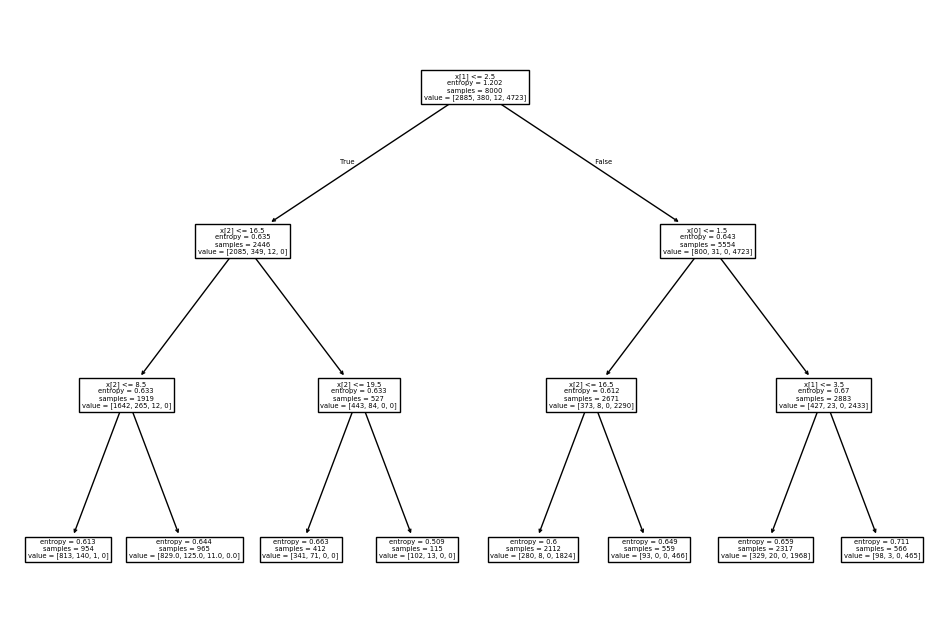

In [61]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in 'Sleep_Quality' with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


nb_classifier = GaussianNB()
nb_classifier.fit(X_train_imputed, y_train)

GaussianNB()

In [64]:
y_pred_nb = nb_classifier.predict(X_test_imputed)

### Check accuracy score with naive bayes

In [65]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.7705


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [66]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

        Mild       0.86      0.70      0.77       694
    Moderate       0.00      0.00      0.00        83
      Severe       0.00      0.00      0.00         5
        none       0.85      1.00      0.92      1218

    accuracy                           0.85      2000
   macro avg       0.43      0.43      0.42      2000
weighted avg       0.82      0.85      0.83      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

        Mild       0.86      0.70      0.77       694
    Moderate       0.00      0.00      0.00        83
      Severe       0.00      0.00      0.00         5
        none       0.85      1.00      0.92      1218

    accuracy                           0.85      2000
   macro avg       0.43      0.43      0.42      2000
weighted avg       0.82      0.85      0.83      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

        Mild       0.86      0.47      0.60       694
    Moderate       0.00      0.00      0.00        83
      Severe       0.00      0.00      0.00         5
        none       0.75      1.00      0.86      1218

    accuracy                           0.77      2000
   macro avg       0.40      0.37      0.37      2000
weighted avg       0.76      0.77      0.73      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
# Make a prediction with the gini index model

# Input values: buying high, maint low, doors 4, persons 2, lug_boot med, safety low
# These values need to be encoded according to the maps created earlier
input_data = {
    'Gender': Gender_map['Female'],
    'Sleep_Quality': Sleep_Quality_map['Poor'],
    'Country': Country_map['USA'],

}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# To get the inverse, we can use the class_map to get the original label
# This was already done in the previous step to print the predicted class.
# class_map = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
# class_map.items() → mengembalikan pasangan (key, value) misalnya ('unacc',0).
# {v:k for k,v in class_map.items()} → menukar posisi key & value.
# inv_class_map = {0: 'unacc', 1: 'acc', 2: 'good', 3: 'vgood'}

# The prediction is already the string label, so no need for inverse mapping
print(f"The predicted class for the given input using the gini index model is: {prediction_gini[0]}")

Prediction: Mild
The predicted class for the given input using the gini index model is: Mild
